## cloud tests
https://colab.research.google.com/github/ecmwf/notebook-examples/blob/master/opencharts/medium-simulated-vis.ipynb#scrollTo=civic-genetics


uses envs/env_clouds.yml - > "clouds" environment


---------

on mac and linux install metview e.g. via brew first:

https://metview.readthedocs.io/en/latest/install.html#install


then install env "clouds"

made upgrade to cartopy==0.24.1, but uses numpy 1.24


for ECMWF forecasts ee
https://www.ecmwf.int/en/forecasts/accessing-forecasts



### Issues:


- then "conda install -c conda-forge cfgrib" pandas does not work
https://github.com/ecmwf/cfgrib - cfgrib==0.9.15.0 with conda forge - does not work, metview does not load





In [51]:
import metview as mv
from ecmwfapi import *
import requests
import xarray
import numpy
import pandas
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as carfeat

print(cartopy.__version__)



0.24.1


In [52]:
#server = ECMWFService("mars")
#server.execute(
#    {
#    "class": "od",
#    "date": "0",
#    "expver": "1",
#    "levtype": "sfc",
#    "param": "260512",
#    "step": "12",
#    "stream": "oper",
#    "time": "00",
#    "type": "ssd",
#    "channel":"3/4",
#    "ident":"71",
#    "grid": "0.25/0.25"
#    },
#    filename)

In [53]:
filename = "medium-simulated-vis.grib"
url = f"https://get.ecmwf.int/repository/opencharts-sample-data/{filename}"
r = requests.get(url)
with open(filename, 'wb') as file:
    file.write(r.content)


    

In [54]:
data = mv.read(filename)

In [55]:
data.describe('cdrfl')


In [56]:
data.ls()


centre shortName typeOfLevel  level  dataDate  dataTime stepRange  \
Message                                                                     
0        ecmf     cdrfl      None     <NA>   20241230      0        12      
1        ecmf     cdrfl      None     <NA>   20241230      0        12      

        dataType number   gridType   
Message                              
0          ssd    None   regular_ll  
1          ssd    None   regular_ll

In [57]:
data = data * 100
cdrfl_3 = data.select(channel= 3)
cdrfl_4 = data.select(channel= 4)

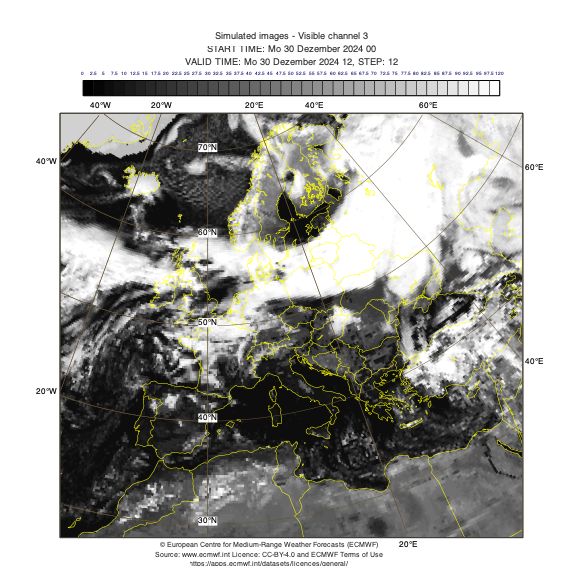

In [58]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="yellow",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "yellow",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
vis_shade = mv.mcont(legend= "on",
            contour = "off",
            contour_level_list = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95, 97.5, 120],
            contour_level_selection_type = "level_list",
            contour_shade = "on",
            contour_shade_cell_resolution = 40,
            contour_shade_colour_direction = "anti_clockwise",
            contour_shade_colour_method = "calculate",
            contour_shade_max_level_colour = "white",
            contour_shade_min_level_colour = "black",
            contour_shade_technique = "cell_shading")

title = mv.mtext(
    text_lines=["Simulated images - Visible channel 3", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, cdrfl_3, vis_shade, title, ecmwf_text)

In [59]:
png = mv.png_output(
      output_name = "medium-simulated-vis-3",   # specify relative or full path
      output_title = "medium-simulated-vis-3",    # title used by a viewer
      output_width = 2000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, cdrfl_3, vis_shade, title, ecmwf_text)

In [60]:
#data.to_dataset()

In [61]:
c3 = data.select(channel= 3)

### 

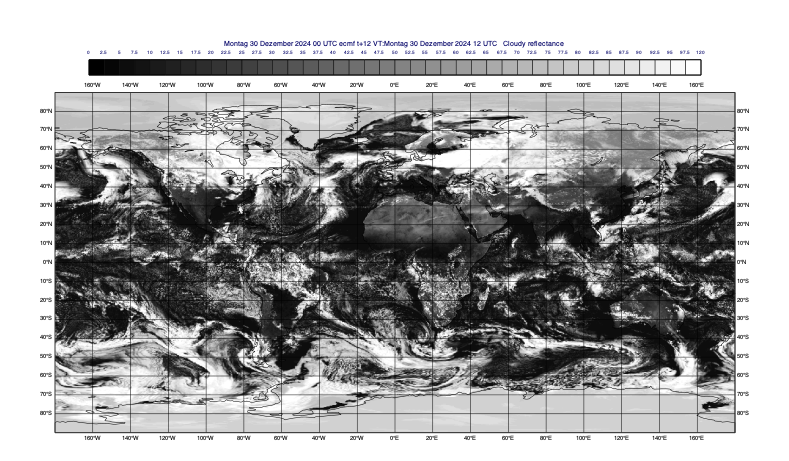

In [62]:
mv.setoutput('jupyter', plot_widget=False)
mv.plot(c3,vis_shade)

In [63]:
keys = mv.grib_get(data, ['shortName', 'dataDate', 'dataTime', 'stepRange', 'validityDate', 'validityTime'])
print(keys)

[['cdrfl', '20241230', '0000', '12', '20241230', '1200'], ['cdrfl', '20241230', '0000', '12', '20241230', '1200']]


In [64]:
min_val = mv.minvalue(data)
max_val = mv.maxvalue(data)
print(f"Min value: {min_val}, Max value: {max_val}")

Min value: 3.6724395751953125, Max value: 117.43083000183105


In [65]:
location = [51, -1]  # Example: latitude, longitude
value_at_location = mv.nearest_gridpoint(data, location)
print(value_at_location)

[37.78804016113281, 50.789594650268555]


In [66]:
max_val = mv.maxvalue(data[0])
max_location = mv.find(data[0], max_val)
print(max_location)
#Extract a time series at this location:

times = mv.valid_date(data)
vals_for_point = mv.nearest_gridpoint(data, max_location[0])
for time, value in zip(times, vals_for_point):
    print(time, value)

[[-45.0, 286.75]]
2024-12-30 12:00:00 107.92353820800781
2024-12-30 12:00:00 117.34232902526855


## use in cartopy

In [67]:

# Extract the data values and coordinates
lats, lons = mv.latitudes(data), mv.longitudes(data)
values = mv.values(data)

In [68]:
#how big is the grid?

print(np.size(lats),np.size(lons))

2076480 2076480


In [69]:
#plt.plot(values)

/Users/chris/python/miniconda3/envs/clouds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/python/miniconda3/envs/clouds/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/chris/python/miniconda3/envs/clouds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/python/miniconda3/envs/clouds/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/chris/python/miniconda3/envs/clouds/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/chris/python/miniconda3/envs/clouds/lib/python3.10/site-packages/shapely/construc

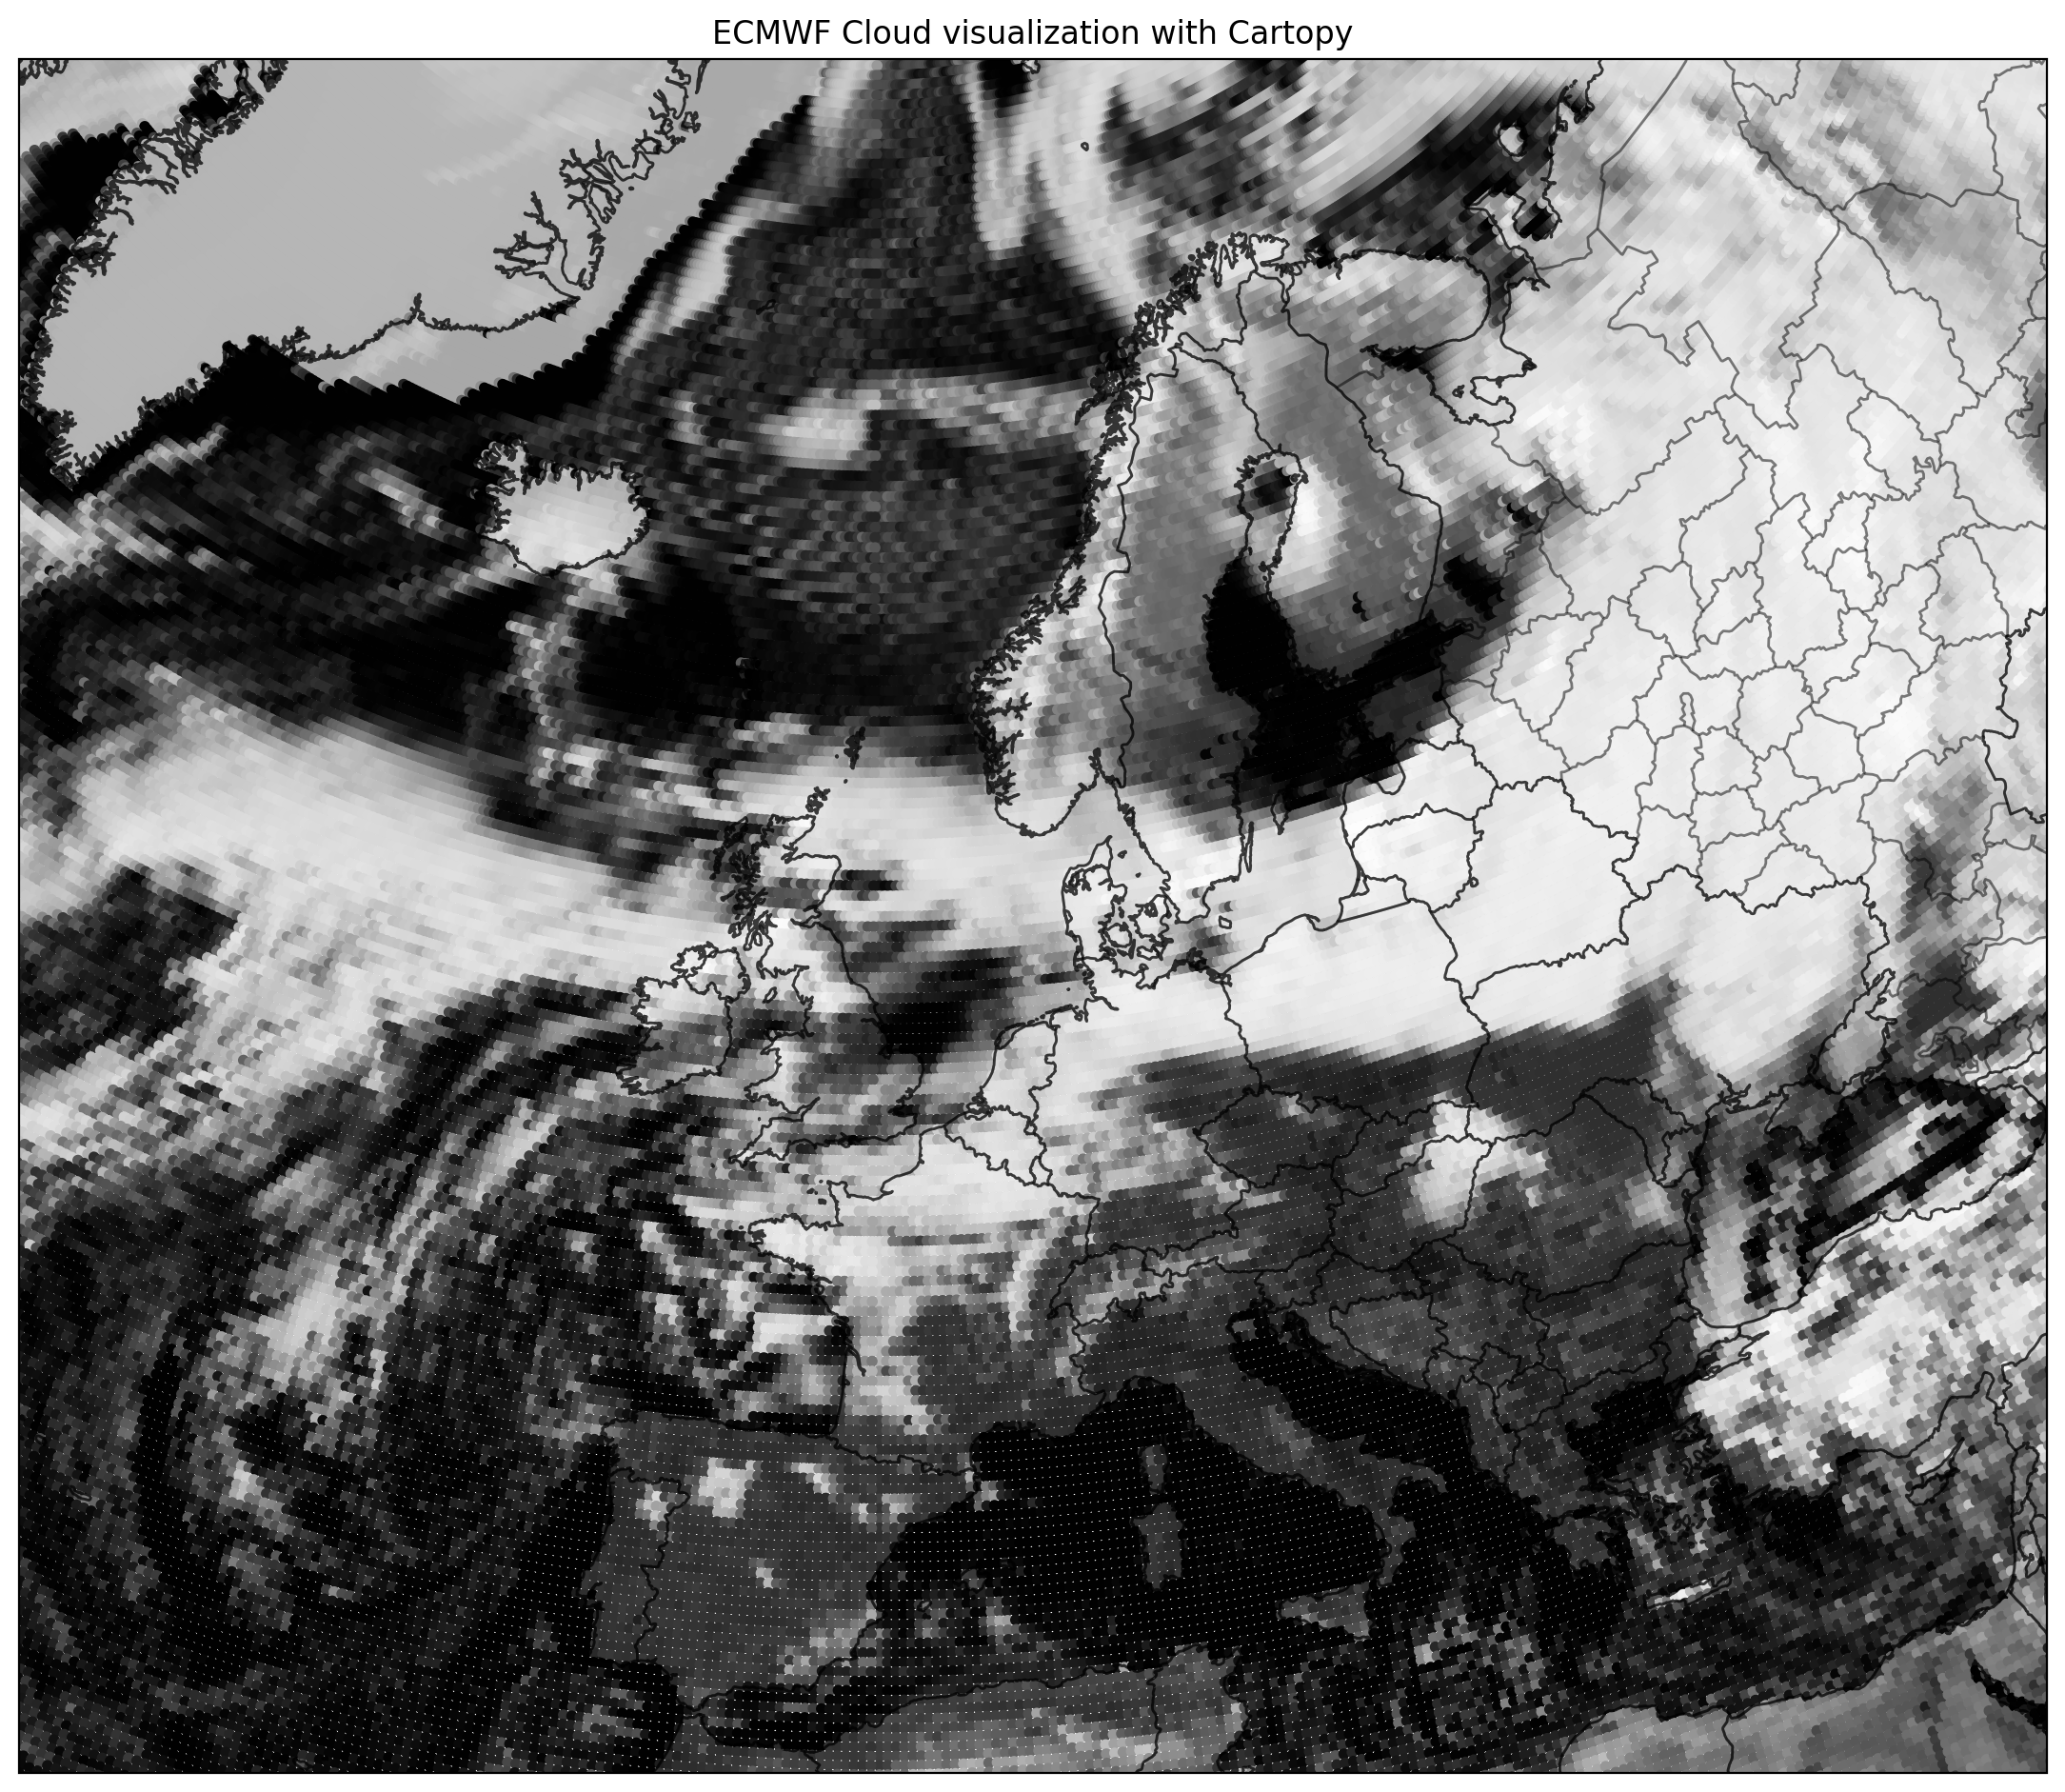

In [71]:
%matplotlib inline

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(20, 10),dpi=200)
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(view_longitude, view_latitude),position=plot_pos)
         
bordercolor='black'; borderalpha=0.5; coastcolor='black';coastalpha=0.5
# Add coastlines and other features
#ax.coastlines()
#ax.add_feature(cfeature.BORDERS, linestyle=':')
#ax.add_feature(cfeature.LAND, edgecolor='white')
europe_east = 35; europe_west = -25; europe_north = 75; europe_south = 30 
europe_mapextent=[europe_west, europe_east, europe_south, europe_north]
ax.set_extent(europe_mapextent)


#get high res country borders  
#https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
borders_10m = carfeat.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', facecolor='none',edgecolor=bordercolor)
ax.add_feature(borders_10m,alpha=borderalpha)
#get high res state borders
provinces_50m = carfeat.NaturalEarthFeature('cultural','admin_1_states_provinces_lines','50m',facecolor='none',edgecolor=bordercolor)
ax.add_feature(provinces_50m,alpha=borderalpha)
#add coastlines
ax.coastlines('10m', color=coastcolor,alpha=coastalpha)

# Plot the data
plt.scatter(lons, lats, c=values, cmap='grey', s=10, transform=ccrs.PlateCarree())

# Add a colorbar
#plt.colorbar(sc, orientation='horizontal', pad=0.05, aspect=50)




# Add a title
plt.title('ECMWF Cloud visualization with Cartopy')

# Show the plot
#plt.show()
plt.savefig('results/clouds/europe.png', format='png', bbox_inches='tight')